In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab04.ok')

Assignment: lab04
OK, version v1.14.15



# Lab 4: Gradient method

This assignment is composed of 6 exercises. For each solved exercise, you get the points indicated below. You need to score at least **7 points** (out of 12) to pass the assignment.

## Instruction

 - Download a copy of this notebook from [Blackboard](https://esiee.blackboard.com/).
 
 
 - Run `jupyter notebook` on your computer, and open the `.ipynb` file that you just downloaded.


 - Solve the quizzes by filling in the cells with your solutions. 
 
 
 - Check your answer by running the unit test provided at the end of each quiz.
 
 
 - **Get your work checked before leaving the lab, otherwise you won't get any credit for it.**

## Grading

| Exercise | Topic | Points |
|----------|------|--------|
| Quiz 1 | Automatic differentiation | 1 |
| Quiz 2 | Gradient descent | 2 |
| Quiz 3 | Convex function of one variable | 2 |
| Quiz 4 | Convex function of multiple variables | 2 |
| Quiz 5 | Nonconvex function of one variable | 2 |
| Quiz 6 | Nonconvex function of multiple variables | 3 |

## Required packages

For this assignment, you need to import the following packages.
- [**Numpy**](www.numpy.org) - The library for scientific computing in Python.
- [**Matplotlib**](http://matplotlib.org) - The library for plotting graphs in Python.
- [**Autograd**](https://github.com/HIPS/autograd) - The library for automatic differentiation of Numpy code.

In [2]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Quiz 1. Automatic differentiation

> **Implement the following function, and then compute its gradient with autograd:** 
>
> $$ (\forall {\bf w}=[w_0,w_1,\dots,w_N]^\top\in \mathbb{R}^{N+1})\qquad f({\bf w}) = w_0 + a_1 w_1 + \dots a_N w_N. $$
>
> **where the vactor ${\bf a} = [a_1,\dots,a_N]^\top \in \mathbb{R}^{N}$ is given.**

> *Hints:* Note that the vectors ${\bf w}$ and ${\bf a}$ don't have the same size:
> - `w` - vector of shape `(N+1,)`
> - `a` - vector of shape `(N,)`. 
>
> To get around this, you can proceed as follows:
> - Slice `w` so as to extract the elements `w[1], ..., w[N]`.
> - Compute the scalar product between `a` and the above elements.
> - Add `w[0]` to the final result.

In [3]:
function = lambda w, a: np.sum(w[1:]*a) + w[0] # YOUR CODE HERE
gradient = grad(function) # YOUR CODE HERE

In [4]:
ok.grade("autograd");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Quiz 2. Gradient descent

> **Complete the implementation of gradient descent, where you need to code the update step:** 
>
> $$ {\bf w} \leftarrow {\bf w} - \alpha\nabla J({\bf w}). $$

> *Remark.* The values returned by `gradient_descent()` are
>  - the final point ${\bf w}_K$,
>  - the entire sequence of iterates ${\bf w}_0, {\bf w}_1, \dots, {\bf w}_K$. 

In [5]:
def gradient_descent(cost_fun, w_init, alpha, epochs):
    """Find the point that minimizes the cost function.
    
    INPUTS:
    cost_fun -- Cost function | callable
    w_init   -- Initial point | numpy array
    alpha    -- step-size     | scalar
    epochs   -- n. iterations | integer
    
    OUTPUTS:
    w       -- final point
    history -- sequence of iterates w0, w1, ...
    """
    
    # automatic gradient
    from autograd import grad
    gradient = grad(cost_fun)
    
    # initialization
    w = np.array(w_init).copy()
    
    # gradient descent
    history = [w]   
    for k in range(epochs):
        
        # compute the next point
        w = w - alpha*gradient(w)

        # track the history
        history.append(w)
        
    return w.squeeze(), np.stack(history)

In [6]:
ok.grade("gradient_descent");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The figure below displays the set of points ${\bf w}_0, {\bf w}_1,\dots, {\bf w}_K$ generated by gradient descent for the line fitting problem.

In [7]:
def generate_points(N=20, seed=42):
    np.random.seed(seed)
    x = np.random.rand(N)
    y = 0.5*x + 2 + 0.05 * np.random.randn(N)
    return x, y

def show_history(history, x, y, lines=True):
    a_values, b_values = np.meshgrid(np.arange(-1,2.5,0.05), np.arange(1,2.7,0.05))
    J_values = np.sum((a_values.flatten()[:,None] * x + b_values.flatten()[:,None] - y)**2, axis=1)
    J_values = J_values.reshape(a_values.shape)
    fig = plt.figure(figsize=(7,5))
    draw_contours(a_values, b_values, J_values)
    draw_points(history, lines)
    plt.show()
    
def draw_contours(X, Y, Z):
    from matplotlib.colors import LogNorm
    cs = plt.contour(X, Y, Z, levels=np.logspace(-1.5,2,9), norm=LogNorm(), alpha=.4, colors = 'k')
    plt.clabel(cs, inline=1, fontsize=10)
    plt.contourf(X, Y, Z, levels=np.logspace(-1.5,2,9), norm=LogNorm(), cmap='jet', alpha=.4)
    
def draw_points(history, lines=True):
    colorspec = make_colorspec(history)
    plt.scatter(history[:,0], history[:,1], color=colorspec, s=80, edgecolor='k', alpha=0.9, zorder=3)
    if lines:
        plt.plot(history[:,0], history[:,1], color='k', alpha=0.7, linewidth=2, zorder=2)
    
def make_colorspec(w_hist):
    s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
    s.shape = (len(s),1)
    t = np.ones(len(w_hist[round(len(w_hist)/2):]))
    t.shape = (len(t),1)
    s = np.vstack((s,t))
    colorspec = []
    colorspec = np.concatenate((s,np.flipud(s)),1)
    colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
    return colorspec

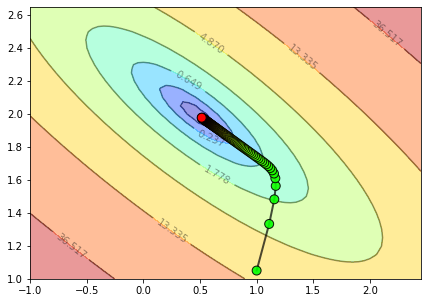

In [8]:
x, y = generate_points()

cost = lambda w: np.sum((w[0]*x + w[1] - y)**2)

w, history = gradient_descent(cost, w_init=[1,1.05], alpha=0.01, epochs=100)

show_history(history, x, y)

## Quiz 3. Convex function of one variable

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ (\forall w\in\mathbb{R})\qquad J(w) = \frac{1}{50}\Big( w^4 + w^2 + 10w\Big). $$

> **2. Compute the (global) minimum with the analytical expression:**
>
> $$ \bar{w} = \sqrt[3]{\frac{\sqrt{2031}-45}{36}} - \sqrt[3]{\frac{1}{6\left(\sqrt{2031}-45\right)}}. $$

> **3. Find the minimum point with gradient descent, and check that the numerical error w.r.t. the exact solution $\bar{w}$ is less than $10^{-5}$.**

> *Hints:* 
>  - You may find useful the functions [`np.sqrt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html) and [`np.cbrt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cbrt.html)
>  - Evaluate the error through the absolute difference $|w - \bar{w}|$
>  - To reduce the numerical error, increase the number of iterations in gradient descent.

In [19]:
# Answer 1. Cost function
cost_fun = lambda w: 1/50*(w*w*w*w + w*w + 10*w)

# Answer 2. Analytical solution
w_bar = np.cbrt((np.sqrt(2031)-45)/36) - np.cbrt(1/(6*(np.sqrt(2031)-45)))

# Answer 3a. Optimization
... # YOUR CODE HERE
w_min, _ = gradient_descent(cost_fun, w_bar, 0.01, 1000)

# Answer 3b. Numerical error
error = abs(w_bar-w_min)

print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

  Exact solution: -1.2347728250533112
Gradient descent: [0.51484455 1.9780913 ]
 Numerical error: 0e+00


In [17]:
ok.grade("convex_one");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Quiz 4. Convex function of multiple variables

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ \big(\forall {\bf w}\in\mathbb{R}^N\big)\qquad J({\bf w}) = \frac{1}{2}\|A{\bf w}-{\bf b}\|^2 $$
>
> **where the matrix $A \in \mathbb{R}^{P\times N}$ and the vector ${\bf b} \in \mathbb{R}^{P}$ are given.**

> **2. Compute the (global) minimum with the analytical expression:**
>
> $$ {\bf\bar{w}} = \big(A^\top A\big)^{-1} A^\top b $$
>
> **using $A=\begin{bmatrix} 1 & 2 \\ 3 & 2 \end{bmatrix}$ and  ${\bf b} = \begin{bmatrix}1 \\ -2 \end{bmatrix}$.**

> **3. Find the minimum point with gradient descent, and check that the numerical error w.r.t. the exact solution $\bar{\bf w}$ is less than $10^{-5}$.**

> *Hints:* 
>  - Recall the basic operations of linear algebra in NumPy:
      - The operator [`@`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul) performs a matrix multiplation;
      - The function [`np.linalg.inv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) performs a matrix inversion;
      - The attribute [`.T`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.T.html) performs a matrix transpose.
      - The function [`np.linalg.norm`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) computes the norm $\|\cdot\|$ of a vector/matrix.
>  - Evaluate the error through the Euclidean distance $\|{\bf w} - {\bf\bar{w}}\|$.
>  - To reduce the numerical error, increase the number of iterations in gradient descent.

In [40]:
# Answer 1. Cost function
def quadratic_function(w, A, b):
    w = np.array(w)
    J = 0.5*np.linalg.norm(A@w - b)**2
    return J
    

# Answer 2. Analytical solution
A = np.array([[1.,2],[3,2]])
b = np.array([1.,-2])
w_bar = np.linalg.inv(A.T@A)@A.T@b

# Answer 3a. Optimization
cost_fun = lambda w: quadratic_function(w, A, b)

print(cost_fun(w_bar))

w_min, _ = gradient_descent(cost_fun, w_bar, 0.001, 10000)

# Answer 3b. Numerical error
error = np.linalg.norm(w_bar-w_min)
print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

4.930380657631325e-31
  Exact solution: [-1.5   1.25]
Gradient descent: [0.51484455 1.9780913 ]
 Numerical error: 0e+00


In [41]:
ok.grade("convex_multi");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Quiz 5. Nonconvex function of one variable

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ (\forall w\in\mathbb{R})\qquad J(w) = \cos(2w+1) + 0.2 w^2. $$

> **2. Find the global minimum with gradient descent, and check that the numerical error w.r.t. the exact solution $\bar{w}\approx0.972883$ is small.**

> *Hints:* 
>  - You may find useful the function [`np.cos()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html)
>  - You should try out different initializations, until gradient descent converges to the global minimum.
>  - Evaluate the error through the absolute difference $|w - \bar{w}|$

In [49]:
# Answer 1. Cost function
cost_fun = lambda w: np.cos(2*w + 1) + 0.2*(w**2)

# Answer 2a. Optimization
w, _ = gradient_descent(cost_fun, 0., 0.01, 1000)

# Answer 2b. Numerical error
w_bar = 0.972883
error = np.linalg.norm(w_bar - w)

print('  Exact solution:', 1)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

  Exact solution: 1
Gradient descent: 0.9728833956203963
 Numerical error: 4e-07


In [50]:
ok.grade("nonconvex_one");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Quiz 6. Nonconvex function of mutiple variables

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ \big(\forall (\mathbf{c}_1, \dots, \mathbf{c}_K)\in(\mathbb{R}^N)^K\big)\qquad J(\mathbf{c}_1, \dots, \mathbf{c}_K) = \sum_{p=1}^P\left( \min_{k\in\{1,\dots,K\}}\; \left\Vert \mathbf{x}_p - \mathbf{c}_k \right\Vert\right), $$
>
> **where the vectors ${\bf x}_p \in \mathbb{R}^{N}$ are given.**

> *Hint:* You mau find useful the function [`scipy.spatial.distance_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html).

In [57]:
import scipy.spatial as sp
def kmeans_cost(c, X):
    """
    c -- centroids   | matrix of shape (K, N)
    X -- data points | matrix of shape (P, N)
    """
    
    # Compute the squared distances ||x_p - c_k|| for all p and k. Stock them in a matrix of shape (P, K)
    dist = sp.distance_matrix(X, c)
        
    # Compute the minimum 'min_k ||x_p - c_k||'. Perform the operation along the right axis!
    mins = np.min(dist, axis=1)
    
    # Sum everything to get the cost 
    cost = np.sum(mins) # YOUR CODE HERE
    
    return cost

In [58]:
ok.grade("kmeans_cost");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



> **2. Find the global minimum of $J(\mathbf{c}_1, \dots, \mathbf{c}_K)$ with gradient descent.**

> *Hint:* It is important to choose well the initial centroids `c0`. Spread them around, instead of putting them in the same spot!

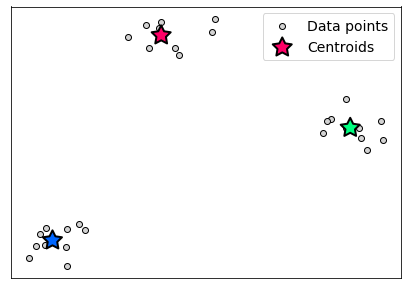

In [69]:
# Data points
X, y = datasets.make_blobs(n_samples=30, random_state=42)

# Cost function
cost_fun = lambda c: kmeans_cost(c, X) # YOUR CODE HERE

# Initialization
np.random.seed(0)
c0 = np.zeros((3,2))

# Optimization
c = c0
c, _ = gradient_descent(cost_fun, c, 0.01, 1000)



# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color='lightgray', edgecolor='k', label='Data points')
plt.scatter(c[:,0], c[:,1], color=[(1,0,0.4), (0, 0.4, 1), (0, 1, 0.5)], s = 400, 
            edgecolor ='k', linewidth = 2, marker=(5, 1), zorder = 3, label='Centroids')
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=14)
plt.show()

In [70]:
ok.grade("kmeans_optimization");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

